# DIABETES RISK PREDICTION

## Introduction

Diabetes has become a significant global health concern, affecting millions of people worldwide. Early detection and prevention are crucial in managing this chronic disease. The CDC Diabetes Health Indicators dataset provides valuable insights into various health factors and their relationship with diabetes. It contains a set of attributes like BMI, age, smoking habits, and other health-related information. By assessing the risk of diabetes, we strive to assist healthcare professionals in detecting high-risk individuals at an early stage.


## Goal of the Project

The goal of this project is to develop a predictive model that helps healthcare professionals identify individuals at high risk for diabetes, enabling early intervention and better management of the condition.

The key objectives of this project are to collect and preprocess healthcare data, perform exploratory data analysis to uncover patterns and insights, and develop machine learning models to predict the likelihood of diabetes. 
The project aims to evaluate and compare model performance using metrics, with the goal of identifying individuals at high risk and improve diabetes management

## Data Story

We will be using the CDC Diabetes Health Indicators dataset, which contains information about individuals health and lifestyle choices. The CDC Diabetes Health Indicators dataset is a collection of health-related data compiled by the Centers for Disease Control and Prevention (CDC). It provides comprehensive information about diabetes and its risk factors, gathered from various sources such as surveys, health screenings, and public health assessments. This dataset typically includes data on individuals' demographics, lifestyle behaviors, and medical conditions, which can be used to understand the prevalence and factors influencing diabetes risk.

The target variable is `Diabetes_012`, which categorizes individuals into three groups:
    
**0: Non-diabetic**
    
**1: Prediabetic**
    
**2: Diabetic**
    


## Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import boxcox
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")

## Load the data

In [2]:
data = pd.read_csv("C:/Users/PAVILION/Downloads/diabetes_012_health_indicators_BRFSS2015.csv")

The dataset is loaded into a Pandas DataFrame using pd.read_csv(). This dataset contains health indicators related to diabetes, which will be used for prediction. Storing the dataset in a DataFrame makes it easier to manipulate and analyze.

In [3]:
data.head(10)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


## Describe the data 

In [4]:
data.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [6]:
data.shape

(253680, 22)

In [7]:
data.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

## Data Preprocessing

In [8]:
# Check for missing values
data.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

The analysis shows that there are no missing values in any of the columns

In [9]:
# Check for duplicate rows
data.duplicated().sum()

23899

In [10]:
# Removing duplicate rows
data= data.drop_duplicates()

In [11]:
data.shape

(229781, 22)

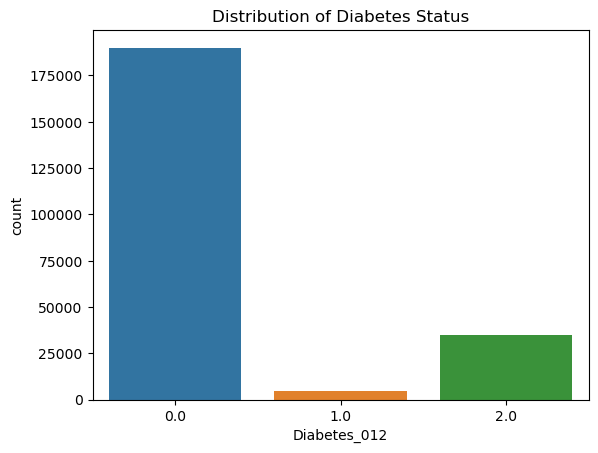

In [12]:
#Data Visualization 
# Visualize the distribution of the target variable
sns.countplot(x='Diabetes_012', data=data)
plt.title("Distribution of Diabetes Status")
plt.show()

A count plot (sns.countplot()) is created to show the distribution of diabetes cases in the dataset. The target variable, Diabetes_012, represents different categories of diabetes. This visualization helps identify whether the dataset is imbalanced, which is important because imbalanced data can affect model performance. 

In [13]:
# Finding the percentage count of 0, 1 and 2 in Diabetes_012 column
print("Percentage composition of Diabetes_012 column")
(data['Diabetes_012'].value_counts()/ data.shape[0])*100

Percentage composition of Diabetes_012 column


Diabetes_012
0.0    82.711364
2.0    15.274109
1.0     2.014527
Name: count, dtype: float64

Here our target variable named diabetic_012 has categorized individuals into three groups:
    
**0: Non-diabetic**
    
**1: Prediabetic**
    
**2: Diabetic**
    
For the purpose of simplifying the classification task, this column is restructured into a binary target variable called is_diabetic, where:
    
**0: Non-diabetic**
    
**1: Diabetic**

In [14]:
#creating a new column is_diabetic
data['is_diabetic'] = data['Diabetes_012'].apply(lambda x: 0 if x == 0 else 1)
(data['is_diabetic'].value_counts()/ data.shape[0])*100

is_diabetic
0    82.711364
1    17.288636
Name: count, dtype: float64

In [15]:
data.nunique()

Diabetes_012             3
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
is_diabetic              2
dtype: int64

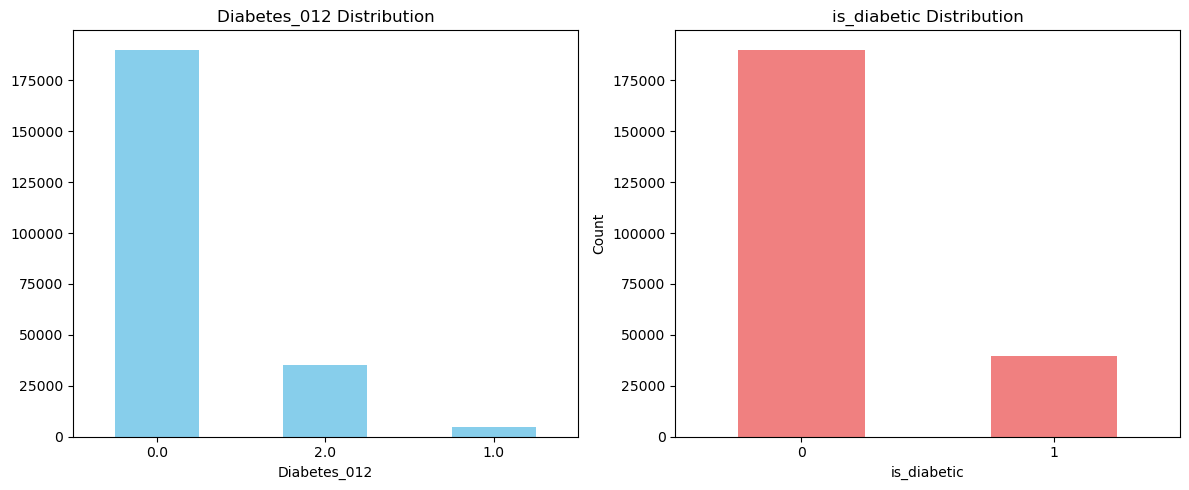

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
data['Diabetes_012'].value_counts().plot(kind='bar', ax=axes[0], color=['skyblue'])
axes[0].set_title('Diabetes_012 Distribution')
axes[0].tick_params(axis='x', rotation=0)

data['is_diabetic'].value_counts().plot(kind='bar', ax=axes[1], color=['lightcoral'])
axes[1].set_title('is_diabetic Distribution')
axes[1].set_ylabel('Count')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

The first plot shows the distribution of Diabetes_012, which likely categorizes individuals into non-diabetic (0), prediabetic (1), and diabetic (2).

The second plot shows the distribution of is_diabetic, which appears to be a binary representation (0 = non-diabetic, 1 = diabetic).

In [17]:
data.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'is_diabetic'],
      dtype='object')

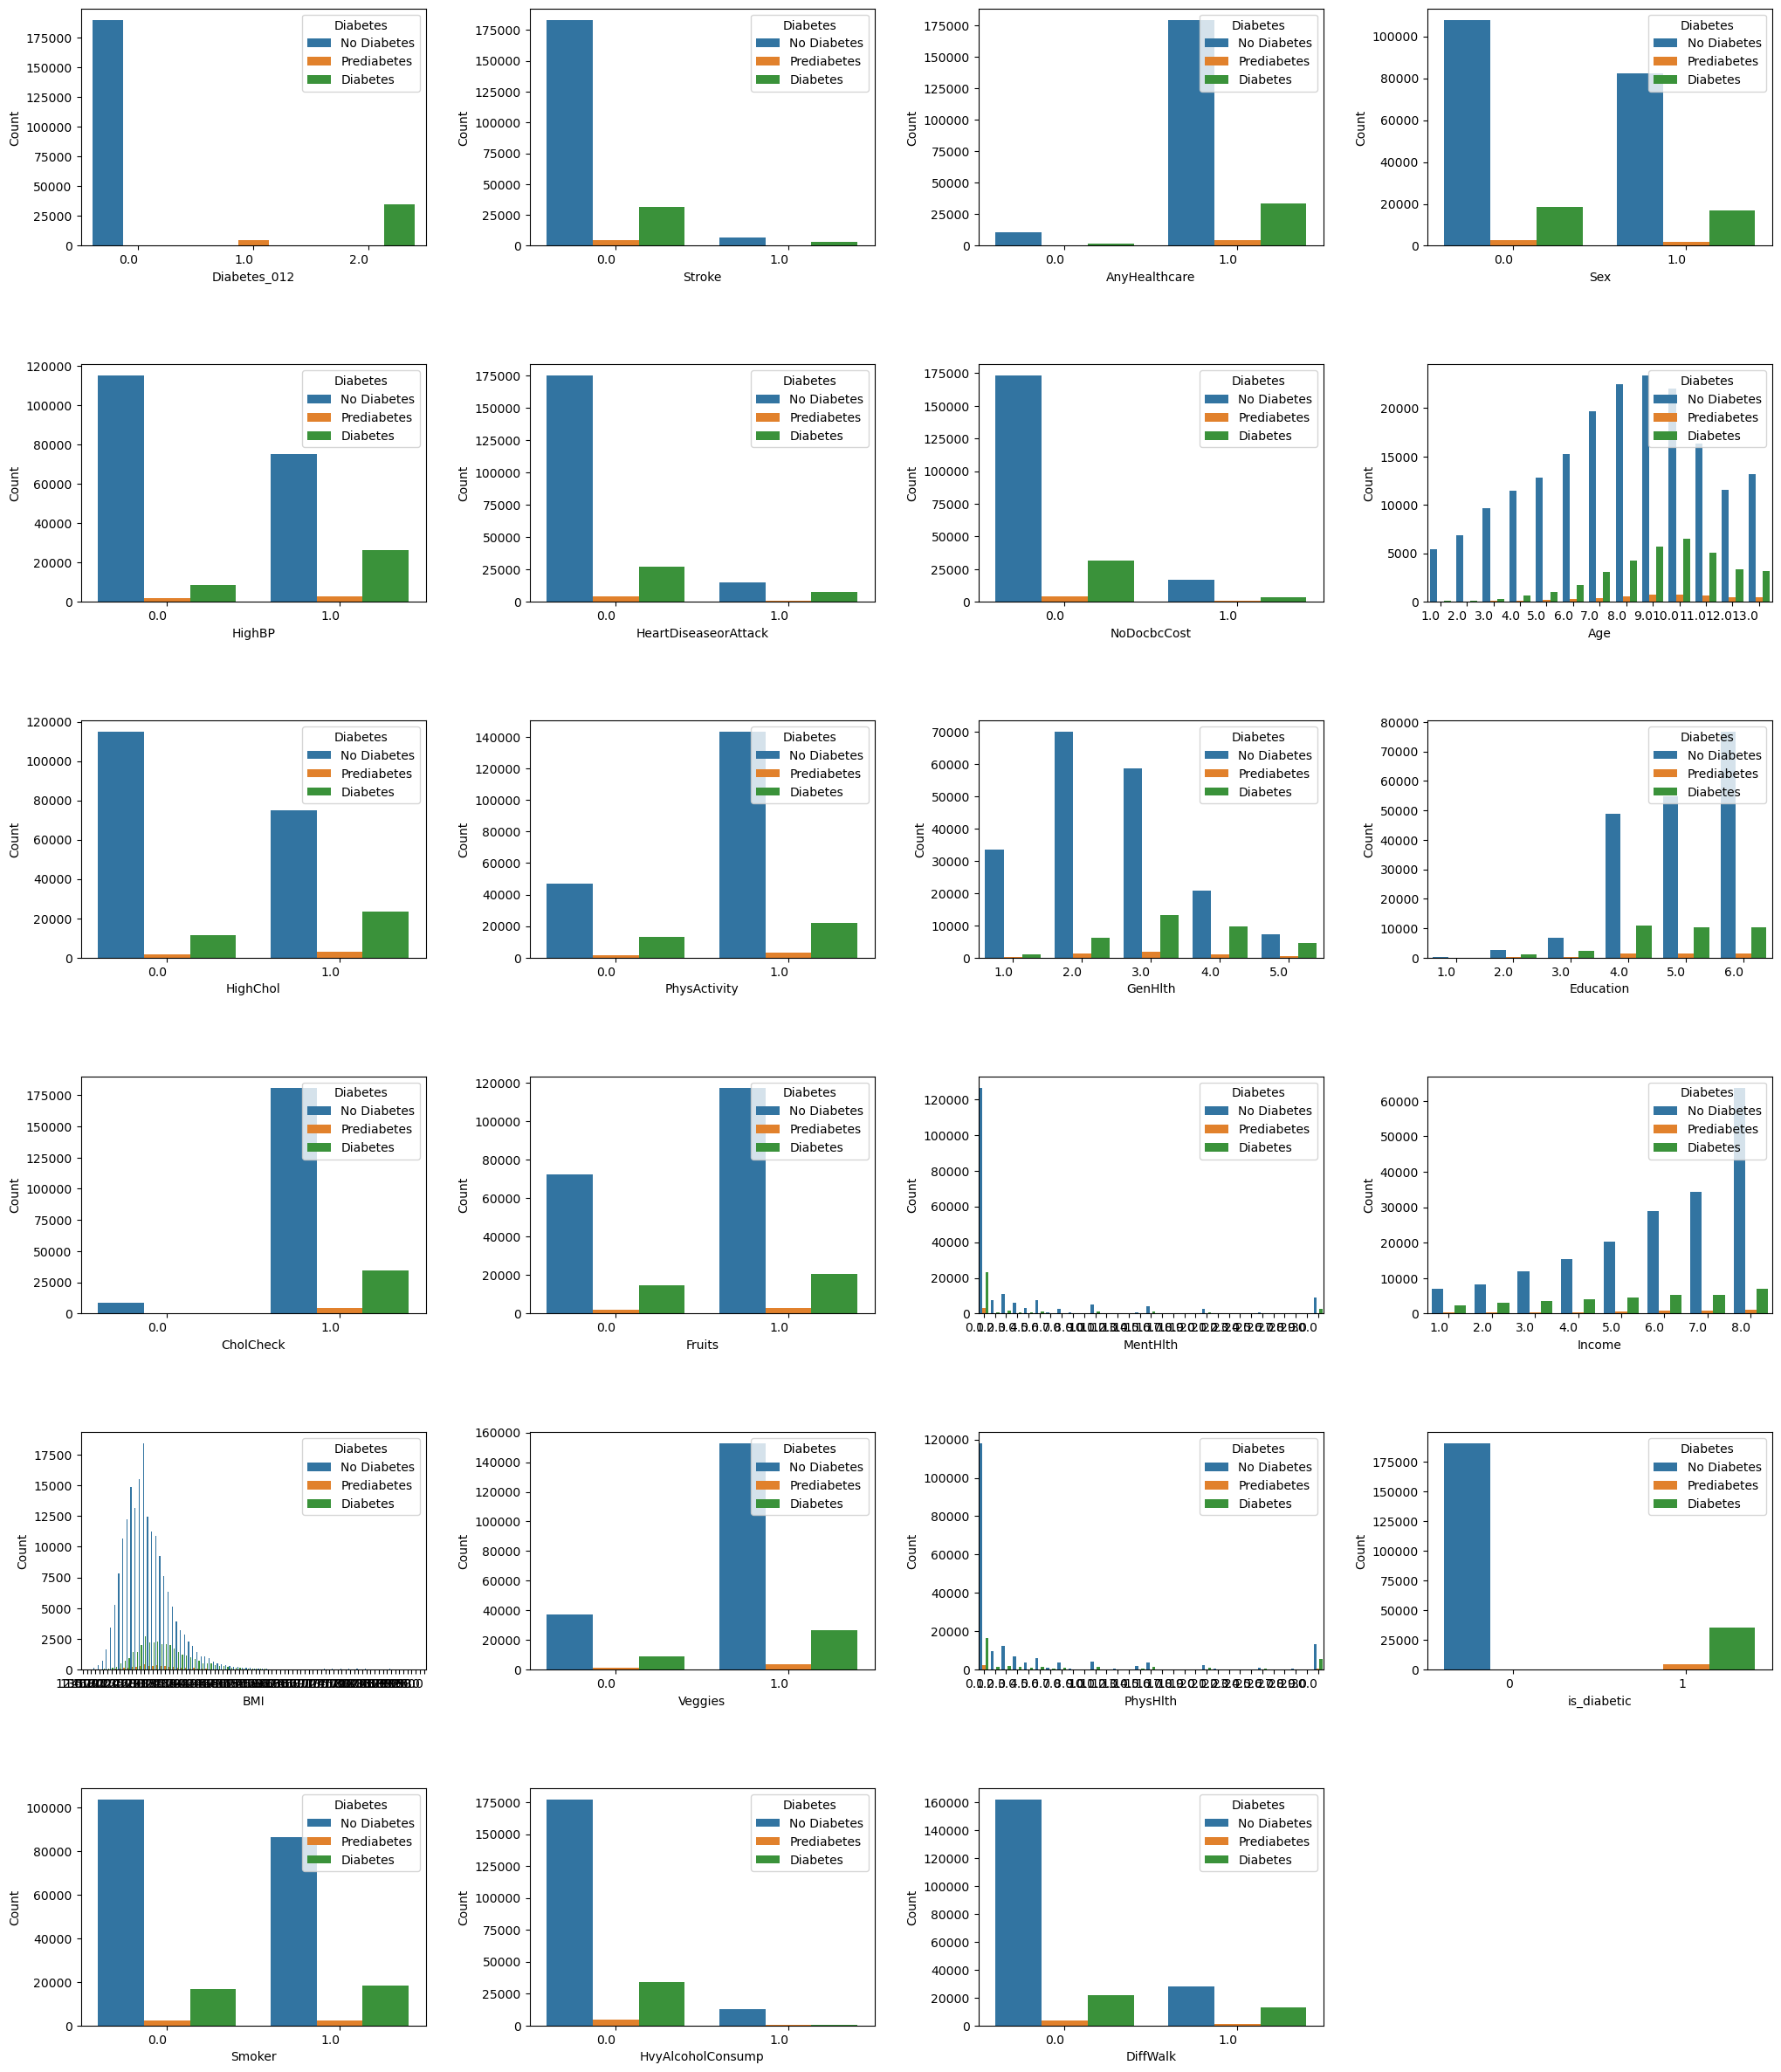

In [18]:
fig, axes = plt.subplots(6, 4, figsize = (25, 30))

# Create bar charts for each predictor variable
for i, pred in enumerate(data):
    # Calculate row and column indices
    row = i % 6
    col = i // 6

    # Create bar chart for each predictor variable
    fig = sns.countplot(x = pred, hue = 'Diabetes_012', data = data, ax = axes[row, col])
    fig.set_xticklabels(fig.get_xticklabels(), horizontalalignment = 'right')
    fig.set_xlabel(pred)
    fig.set_ylabel('Count')
    fig.legend(title = 'Diabetes', loc = 'upper right', labels = ['No Diabetes', 'Prediabetes', 'Diabetes'])

# Adjust the space between subplots
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)

# Hide unused subplots
for j in range(i + 1, 24):
    row = j % 6
    col = j // 6
    axes[row, col].axis('off')

# Show the plot
plt.savefig('diabetes_indicators.png')
plt.show()

These are bar charts for multiple predictor variables, grouped by diabetes status (Diabetes_012). The goal is to compare the distribution of different features across non-diabetic, prediabetic, and diabetic individuals. It helps identify key patterns and relationships between predictor variables and diabetes status.

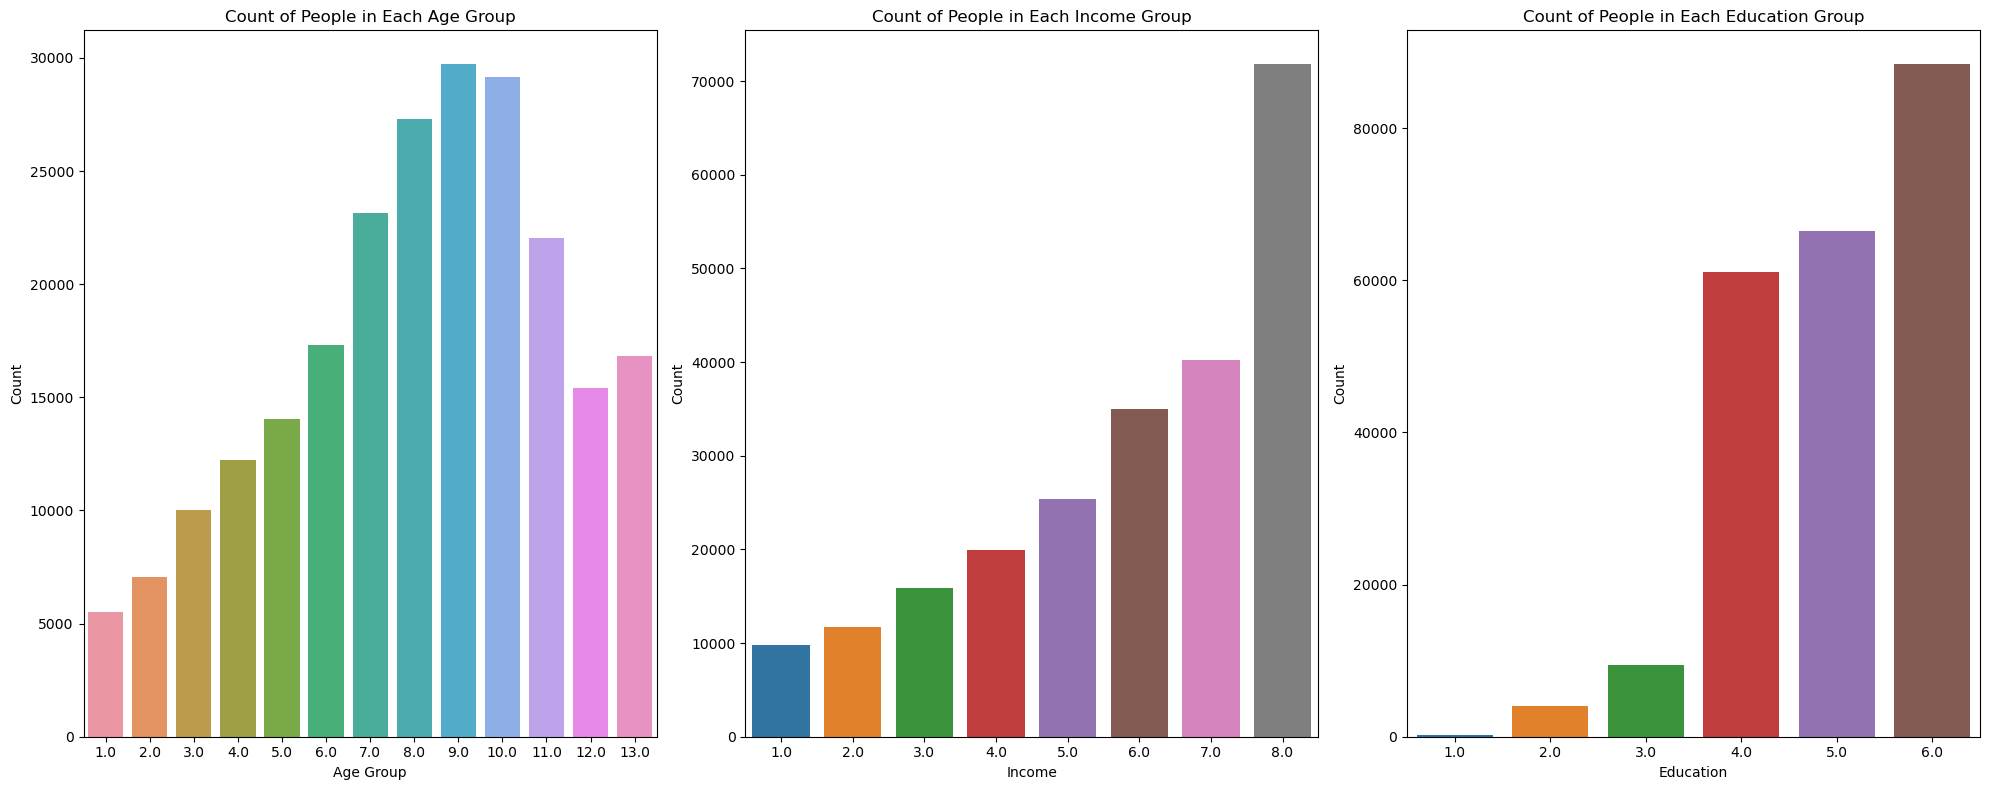

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

sns.countplot(data=data, x='Age', ax=axes[0])
axes[0].set_title('Count of People in Each Age Group')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Count')

sns.countplot(data=data, x='Income', ax=axes[1])
axes[1].set_title('Count of People in Each Income Group')
axes[1].set_xlabel('Income')
axes[1].set_ylabel('Count')

sns.countplot(data=data, x='Education', ax=axes[2])
axes[2].set_title('Count of People in Each Education Group')
axes[2].set_xlabel('Education')
axes[2].set_ylabel('Count')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show plot
plt.show()

These three visualizations provide a demographic overview of the dataset, helping us understand the population structure in terms of age, income, and education. These factors can be strong indicators of health risks and may contribute to diabetes prediction models.

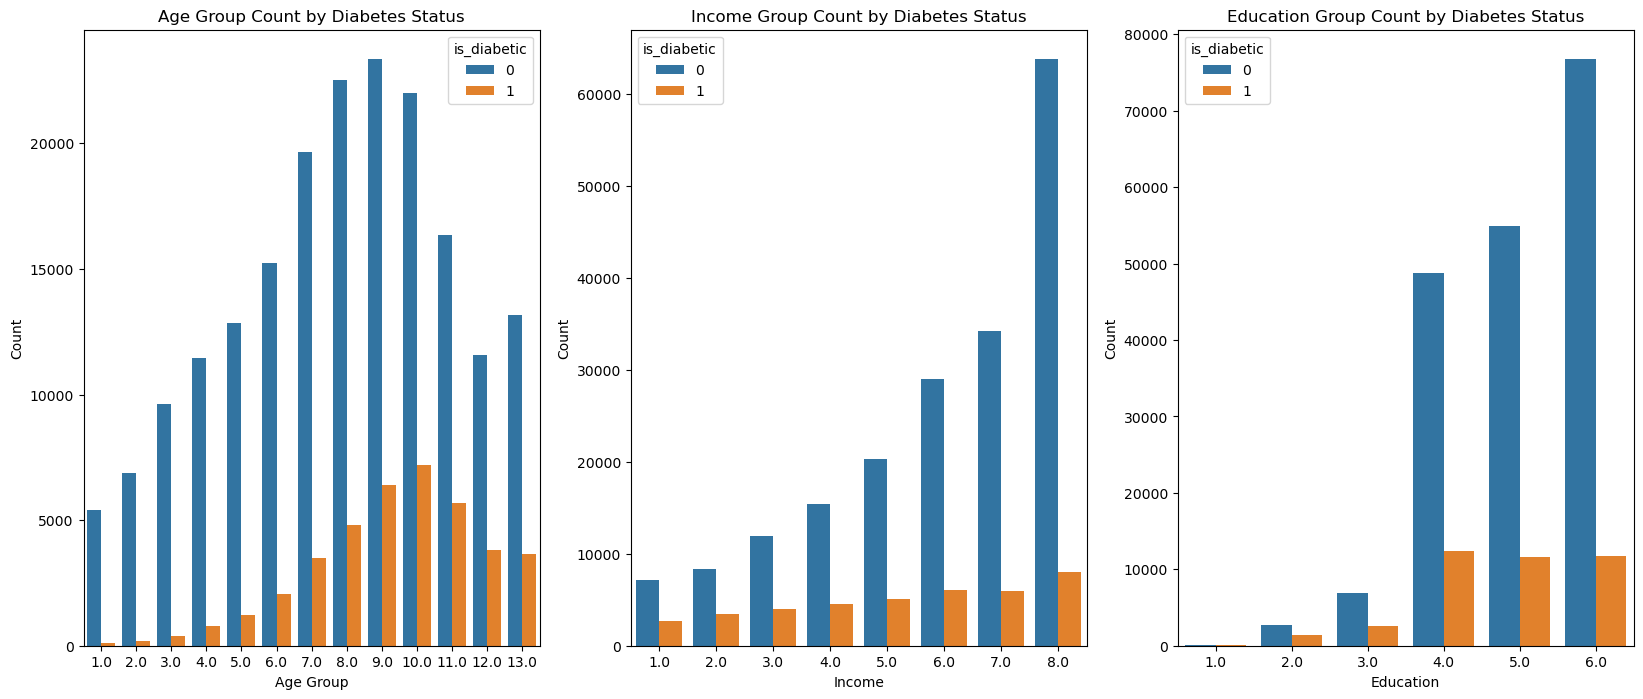

In [20]:
age_diabetes_counts = data.groupby(['Age','is_diabetic'])['is_diabetic'].value_counts().reset_index(name='count')
income_diabetes_counts = data.groupby(['Income','is_diabetic'])['is_diabetic'].value_counts().reset_index(name='count')
education_diabetes_counts = data.groupby(['Education','is_diabetic'])['is_diabetic'].value_counts().reset_index(name='count')

fig, axes = plt.subplots(1, 3, figsize=(20, 8))

sns.barplot(x="Age",y="count",hue="is_diabetic",data=age_diabetes_counts,ax=axes[0] )
axes[0].set_title('Age Group Count by Diabetes Status')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Count')

sns.barplot(data=income_diabetes_counts, x="Income", y="count", hue="is_diabetic",ax=axes[1])
axes[1].set_title('Income Group Count by Diabetes Status')
axes[1].set_xlabel('Income')
axes[1].set_ylabel('Count')

sns.barplot(data=education_diabetes_counts, x="Education", y="count", hue="is_diabetic",ax=axes[2])
axes[2].set_title('Education Group Count by Diabetes Status')
axes[2].set_xlabel('Education')
axes[2].set_ylabel('Count')

plt.show()

 Analyzes the relationship between diabetes status and three demographic factors-Age, Income, and Education by creating grouped bar charts. It helps visualize how diabetes prevalence varies across different groups. These visualizations are critical for understanding socioeconomic and demographic risk factors for diabetes. If older age groups show a higher count of diabetics, it confirms that age is a major risk factor for diabetes. If younger groups have a significant number of diabetics, it may indicate early-onset diabetes or prediabetes cases. If low-income groups have higher diabetes counts, it could suggest a lack of access to healthy food, medical care, or preventive healthcare. If high-income groups also show diabetes prevalence, it might be due to sedentary lifestyles or dietary habits. If diabetes is more common in individuals with lower education levels, it could indicate less awareness of healthy lifestyles or limited healthcare access. If education level does not significantly affect diabetes rates, other factors like genetics and lifestyle might play a stronger role.



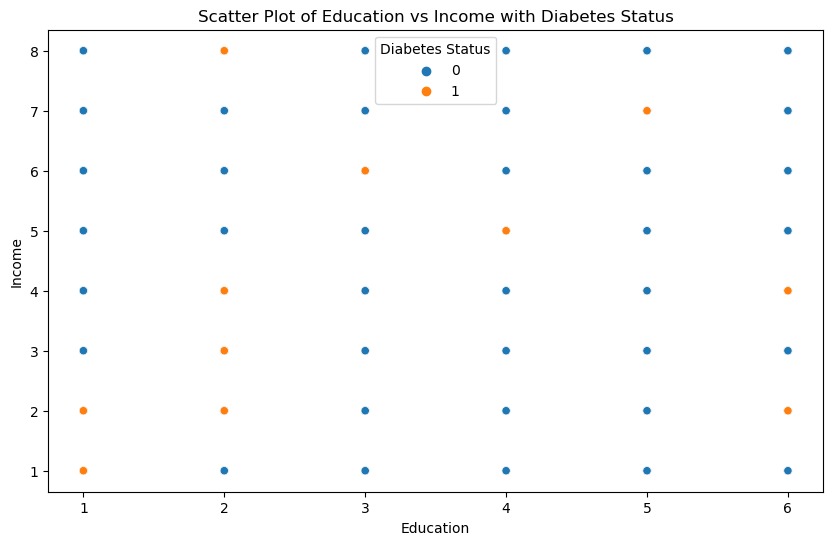

In [21]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=data, x='Education', y='Income', hue='is_diabetic')

plt.title('Scatter Plot of Education vs Income with Diabetes Status')
plt.xlabel('Education')
plt.ylabel('Income')
plt.legend(title='Diabetes Status', loc='upper center')
plt.show()

Scatter plot to visualize the relationship between Education and Income while highlighting diabetes status using color coding. It shows how diabetes prevalence varies across education and income levels. A higher concentration of diabetic cases in lower-income, lower-education groups may indicate limited healthcare access, while a more even spread suggests other influencing factors like genetics and lifestyle.









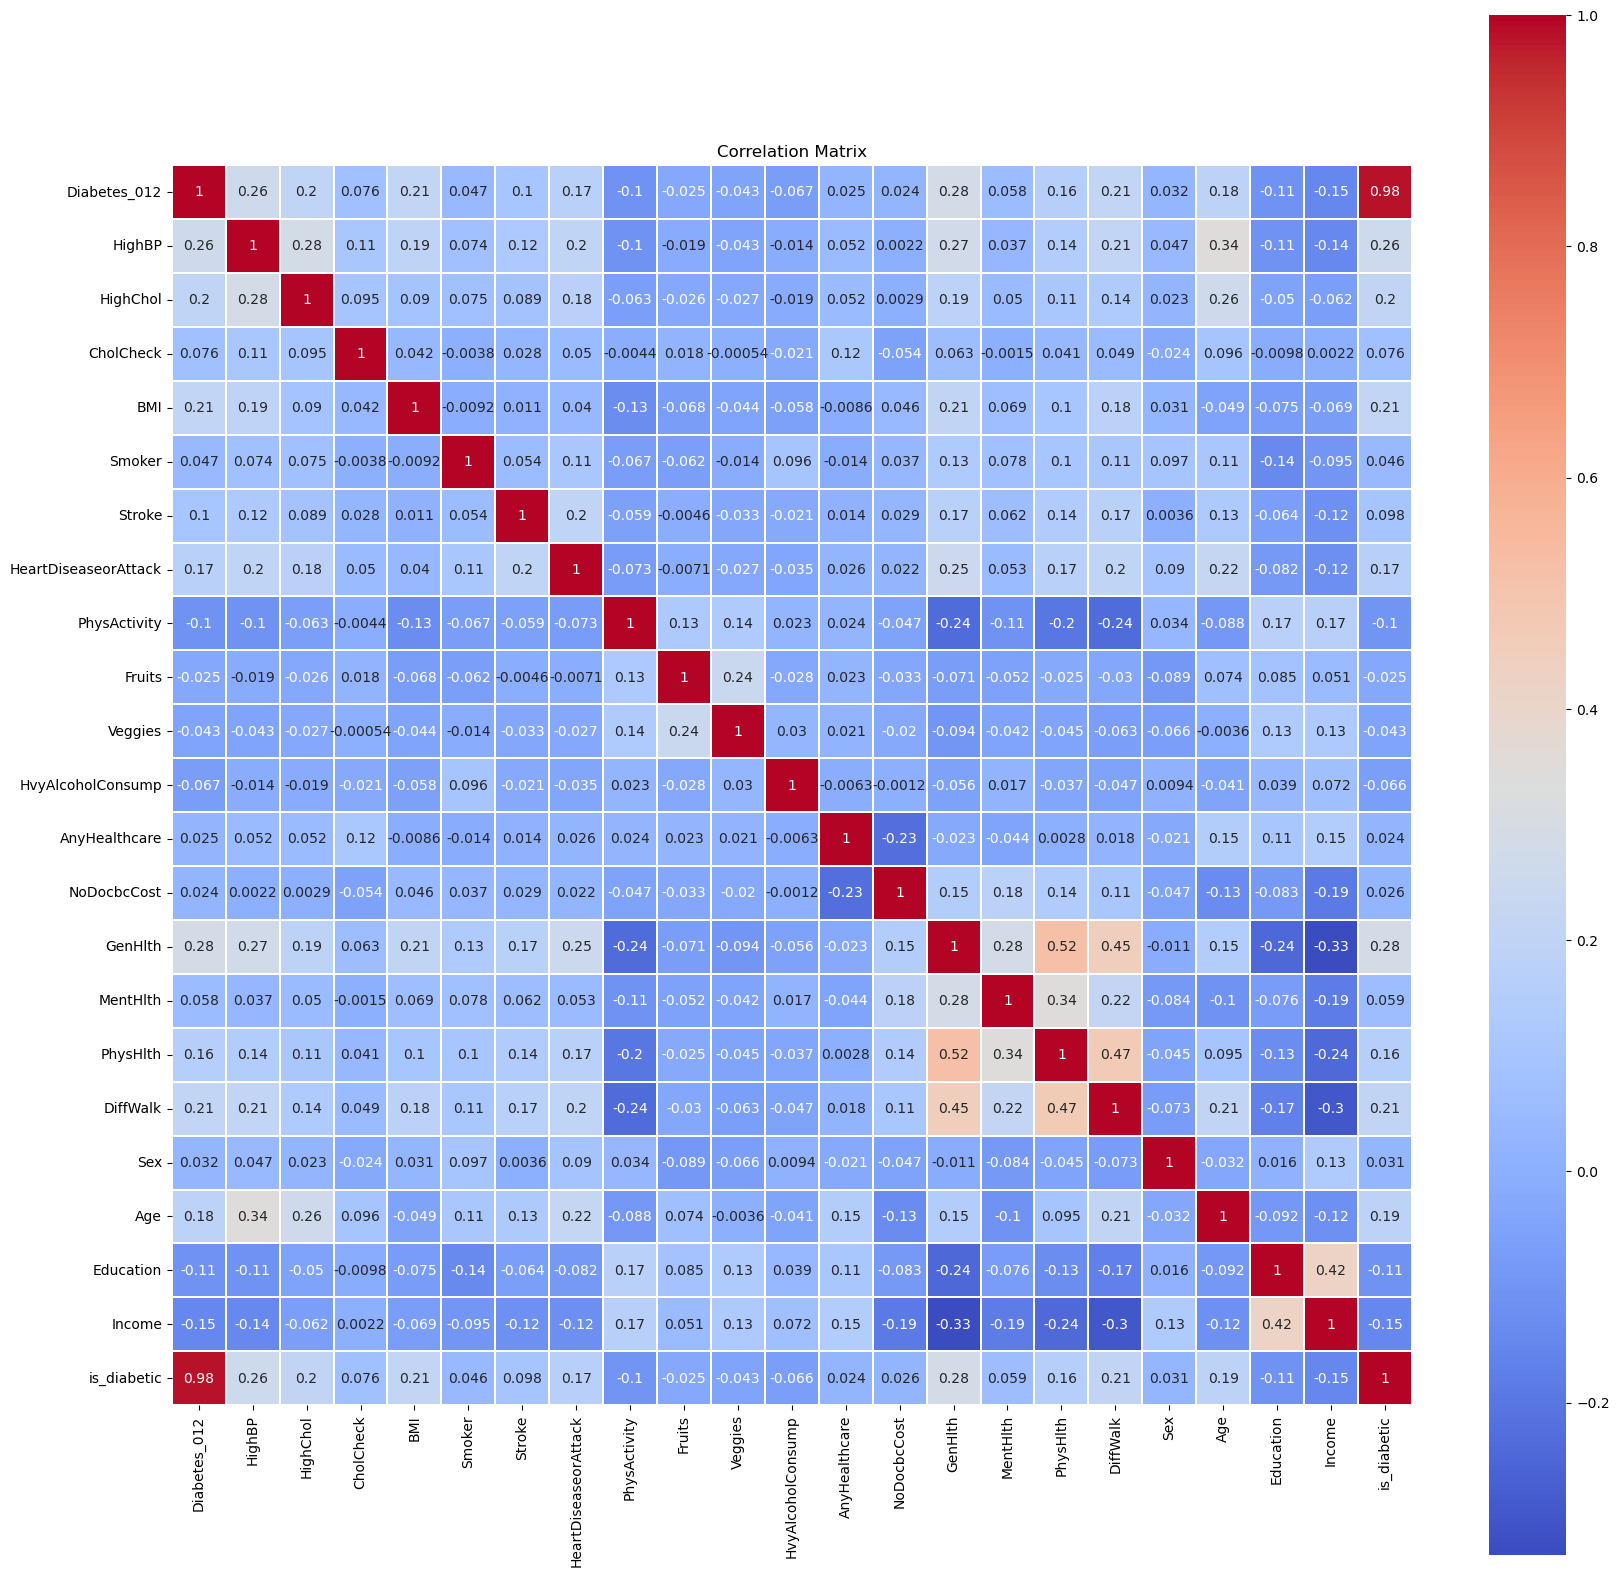

In [22]:
corr_matrix = data.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',square=True,linewidths=.25)
plt.title('Correlation Matrix')
plt.show()

A heatmap is generated to analyze the correlation between numerical features in the dataset. This visualization helps identify relationships between variables, with strong positive or negative correlations highlighted in different colors. Features that have a high correlation with the target variable (Diabetes_012) are strong predictors of diabetes. If two features are highly correlated with each other, it may lead to multicollinearity, which can affect certain models like Logistic Regression. In such cases, one of the correlated features may be dropped to reduce redundancy.

# Finding Outliers

## Boxplot

Outliers in Age: 
Series([], Name: Age, dtype: float64) 


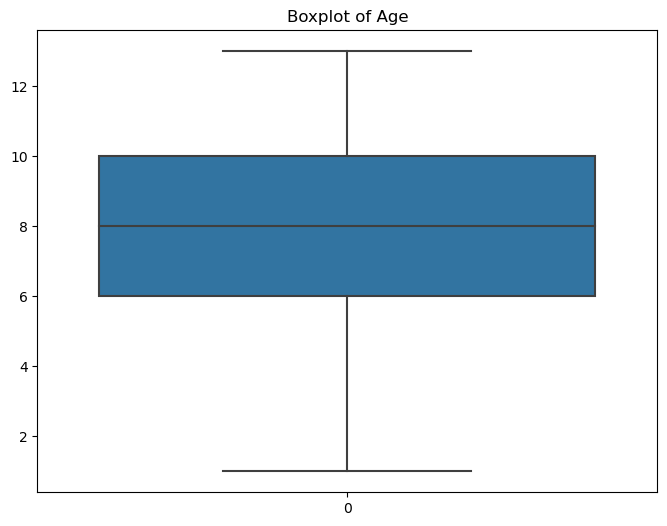

Outliers in BMI: 
85        45.0
97        45.0
156       47.0
201       55.0
203       49.0
          ... 
253370    46.0
253382    46.0
253402    49.0
253482    46.0
253675    45.0
Name: BMI, Length: 5638, dtype: float64 


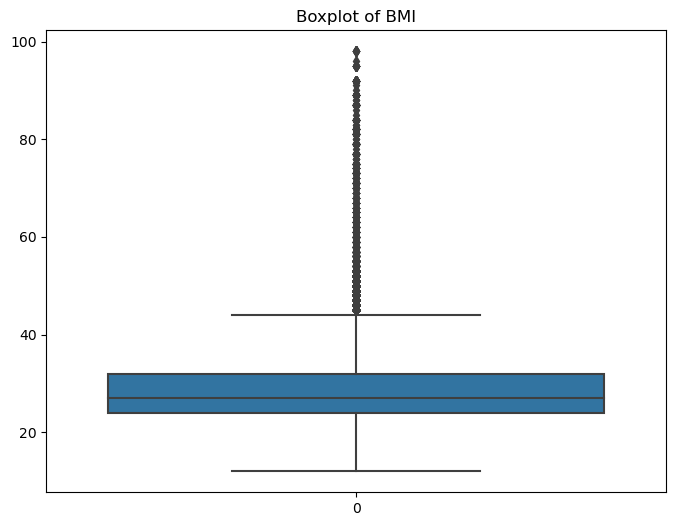

In [23]:
# Numerical columns for outlier detection
numerical_cols = ['Age', 'BMI']

# Function to detect outliers using IQR method
def detect_outliers_iqr(data):
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

# Detect outliers in each numerical column
for col in numerical_cols:
    outliers = detect_outliers_iqr(data[col])
    print(f"Outliers in {col}: \n{outliers} ")

    # Visualize outliers using boxplot
    plt.figure(figsize=(8, 6))
    sns.boxplot(data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

 Detects outliers in Age and BMI using the Interquartile Range (IQR) method, identifying values that fall outside the typical range. Outliers may indicate unusual variations in the dataset, such as extreme age values or abnormal BMI levels, which could affect model performance. The boxplots visually highlight these outliers, helping in deciding whether to remove or transform them for better data consistency. Results show that no outliers were found in the Age column, meaning all age values fall within the expected range based on the IQR method. However, 5,638 outliers were detected in the BMI column, with values ranging from 45.0 to 55.0, indicating significantly high BMI levels compared to the rest of the dataset. These high BMI values may represent obese individuals, which is a crucial factor in diabetes risk analysis.

## Skewness

In [24]:
data.skew()

Diabetes_012            1.825616
HighBP                  0.182997
HighChol                0.234559
CholCheck              -4.664269
BMI                     2.063938
Smoker                  0.137683
Stroke                  4.403481
HeartDiseaseorAttack    2.608378
PhysActivity           -1.055421
Fruits                 -0.463862
Veggies                -1.460067
HvyAlcoholConsump       3.679207
AnyHealthcare          -3.949859
NoDocbcCost             2.806616
GenHlth                 0.352020
MentHlth                2.546808
PhysHlth                2.046245
DiffWalk                1.618154
Sex                     0.244892
Age                    -0.385147
Education              -0.691196
Income                 -0.781619
is_diabetic             1.730089
dtype: float64

Based on these skewness values, we can observe that several variables show significant deviations from normality. For example, a high positive skew in features like BMI (2.06), Stroke (4.40), and HvyAlcoholConsump (3.68) indicates that most observations are clustered at lower values with a long tail of extreme high values, which might be due to a few individuals with very high measurements. Conversely, variables such as CholCheck (–4.66) and AnyHealthcare (–3.95) exhibit strong negative skewness, meaning that most values are high with a few very low outliers. 

Skewness of BMI: 2.063938014894699


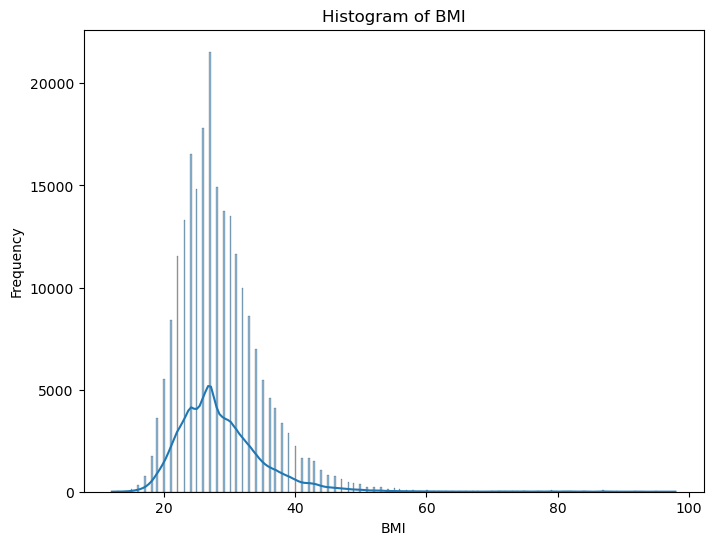

Skewness of Age: -0.38514720011877446


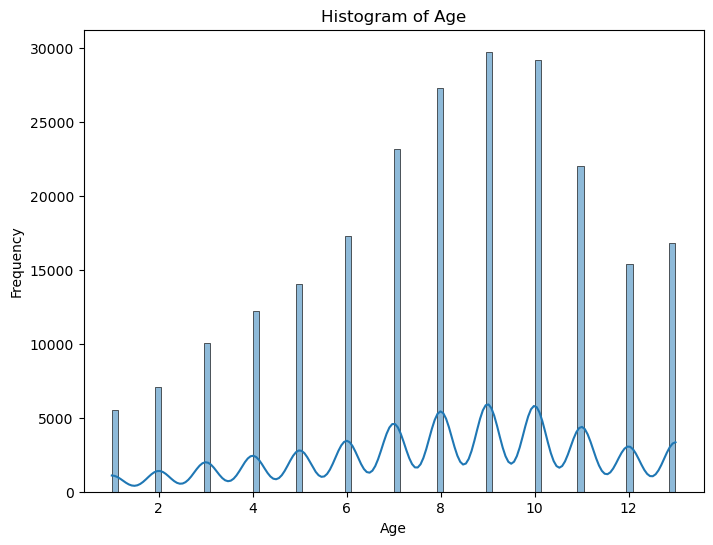

In [25]:
# Numerical columns for skewness check
numerical_cols = ['BMI', 'Age']

# Calculate and print skewness for each numerical column
for col in numerical_cols:
    skewness = data[col].skew()
    print(f"Skewness of {col}: {skewness}")

    # Visualize the distribution using a histogram
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

The skewness analysis shows that BMI is highly right-skewed (2.06), indicating a long tail of high values and potential outliers, whereas Age is nearly symmetric with a slight left skew (–0.39).

Initial skewness of BMI: 2.063938014894699
Skewness of BMI after log transformation: 0.6375339497416975


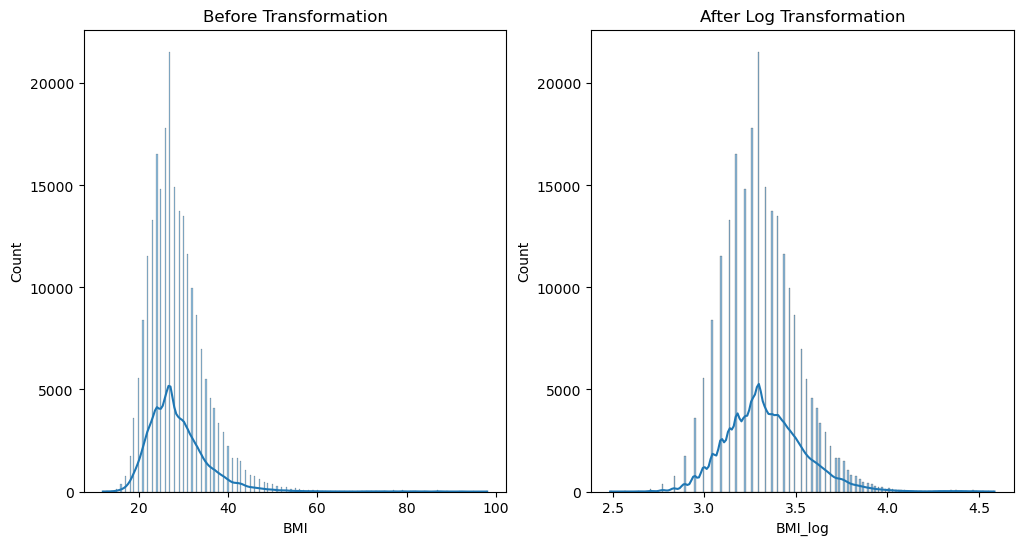

In [26]:
# Check the initial skewness
initial_skewness = data['BMI'].skew()
print(f"Initial skewness of BMI: {initial_skewness}")

# Apply logarithmic transformation
data['BMI_log'] = np.log(data['BMI'])

# Check the skewness after transformation
transformed_skewness = data['BMI_log'].skew()
print(f"Skewness of BMI after log transformation: {transformed_skewness}")

# Visualize the distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['BMI'], kde=True)
plt.title('Before Transformation')

plt.subplot(1, 2, 2)
sns.histplot(data['BMI_log'], kde=True)
plt.title('After Log Transformation')

plt.show()

Before transformation, BMI shows high right skewness (2.06), indicating many extreme high values that could distort analysis.
After applying the logarithmic transformation, skewness reduces to 0.64, meaning the data are considerably more symmetric with fewer extreme values.

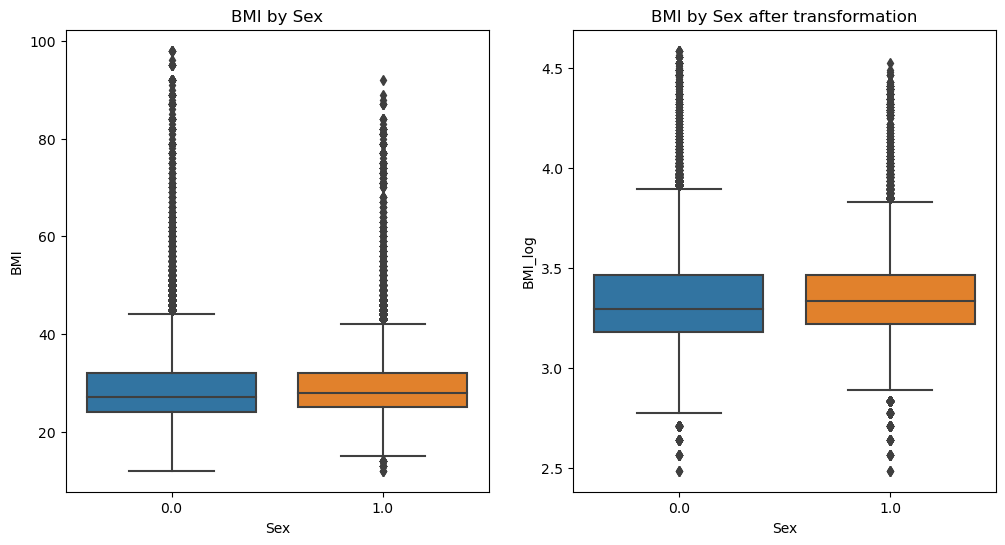

In [27]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

sns.boxplot(x='Sex', y='BMI', data=data)
plt.title('BMI by Sex')

plt.subplot(1, 2, 2)
sns.boxplot(x='Sex', y='BMI_log', data=data)
plt.title('BMI by Sex after transformation')

plt.show()

These boxplots compare BMI distributions by Sex before and after a log transformation. In the raw BMI boxplot, you can observe that extreme values (outliers) may distort the distribution, potentially differing between sexes. After applying the log transformation, the data become more symmetric, compressing the long tail and offering a clearer, more balanced comparison of the central tendency and variability between male and female groups.

## Z-Score

In [28]:
z = np.abs(stats.zscore(data))
threshold = 3
for i in z:
    b =  np.abs(stats.zscore(data[i]))
    outliers_ind = np.where(b > threshold)[0]
    if len(outliers_ind) >0 :
        print(str(i) + ': '+str(len(outliers_ind)))
        

CholCheck: 9298
BMI: 2547
Stroke: 10284
HvyAlcoholConsump: 13950
AnyHealthcare: 12391
NoDocbcCost: 21326
MentHlth: 12644
Education: 4214
BMI_log: 1538


<Figure size 1200x600 with 0 Axes>

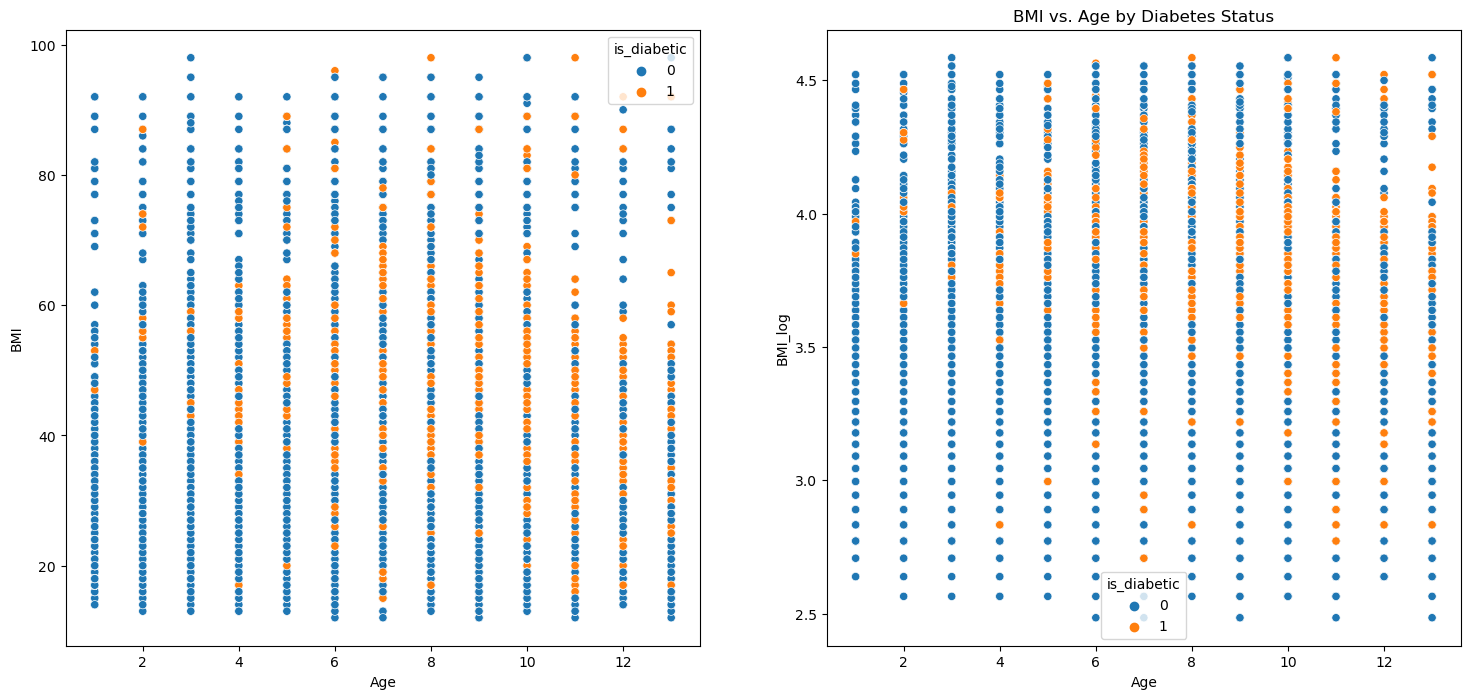

In [29]:
plt.figure(figsize=(12, 6))

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

sns.scatterplot(ax=axes[0],x='Age', y='BMI', data=data, hue='is_diabetic')
plt.title('BMI vs. Age by Diabetes Status')
plt.xlabel('Age')
plt.ylabel('BMI')

sns.scatterplot(ax=axes[1],x='Age', y='BMI_log', data=data, hue='is_diabetic')
plt.title('BMI vs. Age by Diabetes Status')
plt.xlabel('Age')
plt.ylabel('BMI_log')

plt.show()

The Z-score method identified significant outliers in features like CholCheck, BMI, Stroke, and HvyAlcoholConsump, with NoDocbcCost having the highest count (21,326). Applying a log transformation to BMI reduced its skewness and outliers, making the data more normally distributed. Scatter plots showed that the transformation effectively minimized extreme values, which can help improve model performance.

# Model Building

## Feature Selection

In [30]:
data_2=data.copy()

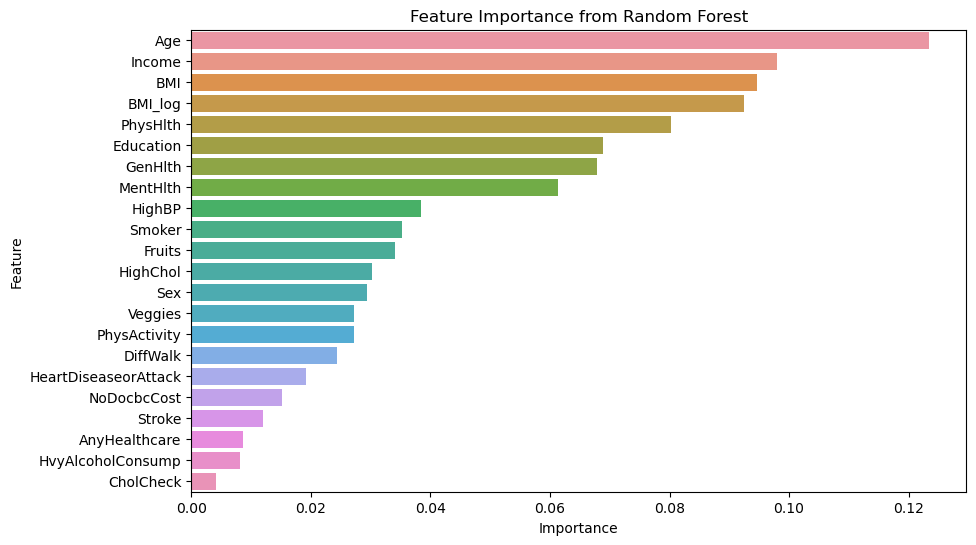

In [31]:
model = RandomForestClassifier()

X = data_2.drop(['Diabetes_012','is_diabetic'], axis=1)  # Features
y = data_2['is_diabetic']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model.fit(X_train, y_train)

selected_col = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income','BMI_log']
# Get feature importance from the trained model
importances = model.feature_importances_

# Create a DataFrame to hold feature names and importance values
feature_importance = pd.DataFrame({
    'Feature': selected_col,
    'Importance': importances
})

# Sort the features by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance from Random Forest')
plt.show()

Performs feature selection using a Random Forest classifier by first creating a copy of the data and then separating the predictors from the target variable ('is_diabetic'). The data is split into training and testing sets, and the model is trained on the training data.
After fitting the model, the built-in feature importance attribute is used to extract importance scores for a predefined list of features. These importance values are paired with their corresponding features in a DataFrame, sorted in descending order, and visualized as a horizontal bar plot titled "Feature Importance from Random Forest."
Age, Income, and the BMI variables (including the log transformation) play particularly strong roles in the model’s diabetes predictions, followed by measures of physical and mental health, education, and certain lifestyle factors.
The feature selection process streamlines model building by focusing on the variables that contribute most significantly to classification performance.

### Filtering only the important features

In [32]:
X= X[['Age', 'Income', 'BMI_log','PhysHlth','Education','GenHlth','MentHlth','HighBP','Smoker']]

## SMOTE ANALYSIS

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train_scaled, y_train)

print("Original dataset shape:", y_train.value_counts())
print("Resampled dataset shape:", pd.Series(y_smote).value_counts())

Original dataset shape: is_diabetic
0    132888
1     27958
Name: count, dtype: int64
Resampled dataset shape: is_diabetic
0    132888
1    132888
Name: count, dtype: int64


Accuracy: 71.06%

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.70      0.80     57167
           1       0.34      0.74      0.47     11768

    accuracy                           0.71     68935
   macro avg       0.64      0.72      0.63     68935
weighted avg       0.83      0.71      0.74     68935



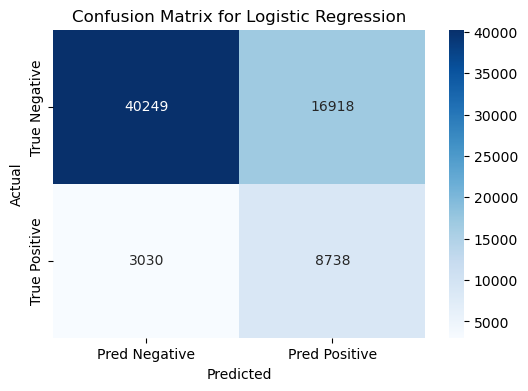

In [34]:
model = LogisticRegression()
model.fit(X_smote, y_smote)
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred Negative', 'Pred Positive'], yticklabels=['True Negative', 'True Positive'])
plt.title(f"Confusion Matrix for Logistic Regression")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

This narrows the model to the most important features and applies SMOTE to balance the training data, ensuring both classes are equally represented.
After scaling and resampling, the logistic regression model achieves an overall accuracy of 71.06%, with high precision for non-diabetics but low precision (34%) for diabetics.
The classification report shows a strong recall (74%) for diabetics, indicating that the model is identifying most diabetic cases despite some false positives.
The confusion matrix confirms that while the majority of non-diabetics are correctly classified, there is still room to improve the model's precision for diabetic predictions.

# Hyper Parameter tuning

Training and tuning Logistic Regression...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Training and tuning Decision Tree...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Training and tuning Random Forest...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Training and tuning KNN...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Training and tuning Gradient Boosting...
Fitting 5 folds for each of 6 candidates, totalling 30 fits

Model: Logistic Regression
Best Hyperparameters: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.1}
Accuracy: 71.07%
Cross-Validation Score: 72.11%
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.70      0.80     57167
           1       0.34      0.74      0.47     11768

    accuracy                           0.71     68935
   macro avg       0.64      0.72      0.63     68935
weighted avg       0.83      0.71      0.74     68935

AUC-ROC: 0.6775


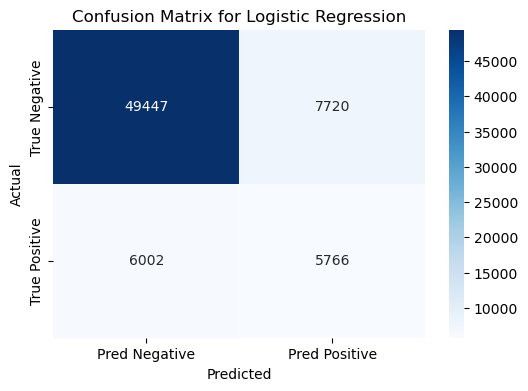


Model: Decision Tree
Best Hyperparameters: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None}
Accuracy: 78.51%
Cross-Validation Score: 84.13%
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87     57167
           1       0.33      0.26      0.29     11768

    accuracy                           0.79     68935
   macro avg       0.59      0.58      0.58     68935
weighted avg       0.77      0.79      0.77     68935

AUC-ROC: 0.6775


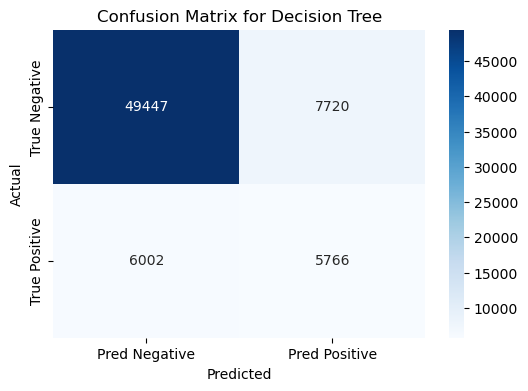


Model: Random Forest
Best Hyperparameters: {'n_estimators': 100, 'max_samples': 0.5, 'max_leaf_nodes': 9, 'max_features': 'sqrt', 'max_depth': 9}
Accuracy: 69.17%
Cross-Validation Score: 72.86%
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.68      0.79     57167
           1       0.33      0.75      0.45     11768

    accuracy                           0.69     68935
   macro avg       0.63      0.71      0.62     68935
weighted avg       0.83      0.69      0.73     68935

AUC-ROC: 0.6775


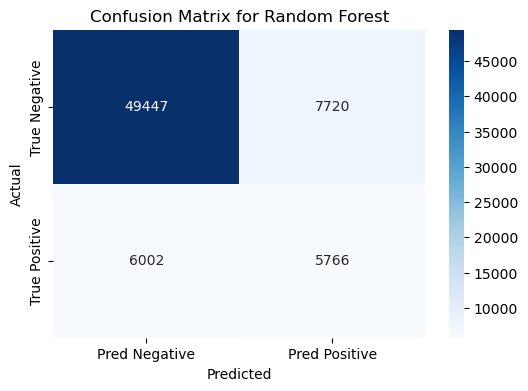


Model: KNN
Best Hyperparameters: {'weights': 'distance', 'n_neighbors': 3}
Accuracy: 74.07%
Cross-Validation Score: 83.08%
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.80      0.84     57167
           1       0.31      0.43      0.36     11768

    accuracy                           0.74     68935
   macro avg       0.59      0.62      0.60     68935
weighted avg       0.78      0.74      0.76     68935

AUC-ROC: 0.6775


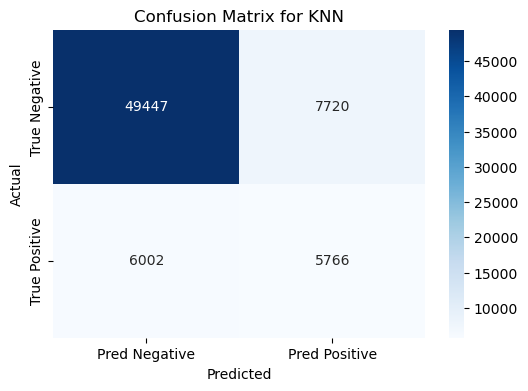


Model: Gradient Boosting
Best Hyperparameters: {'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.1}
Accuracy: 80.09%
Cross-Validation Score: 83.71%
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88     57167
           1       0.43      0.49      0.46     11768

    accuracy                           0.80     68935
   macro avg       0.66      0.68      0.67     68935
weighted avg       0.81      0.80      0.81     68935

AUC-ROC: 0.6775


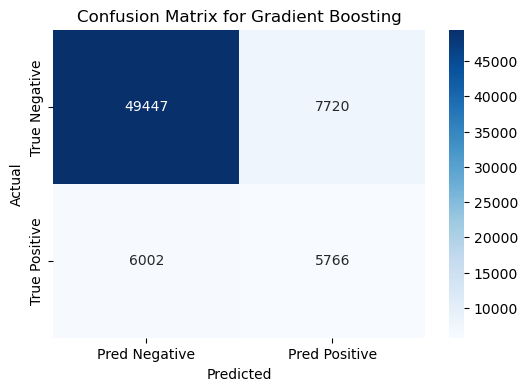


Comparison of all models:
Logistic Regression - Accuracy: 0.7107
Decision Tree - Accuracy: 0.7851
Random Forest - Accuracy: 0.6917
KNN - Accuracy: 0.7407
Gradient Boosting - Accuracy: 0.8009


In [35]:
# Define the models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42), 
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Hyperparameter distributions for tuning
param_distributions = {
    "Logistic Regression": {
        'C': [0.1, 1, 10],
        'penalty': ['l2'],
        'solver': ['lbfgs', 'liblinear']
    },
    "Decision Tree": {
        'max_depth': [5, 10, 15, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5]
    },    
    "Random Forest": {
        'n_estimators':[25, 50, 100], 
        'max_features': ['sqrt', 'log2'],  
        'max_depth': [3, 5, 9],  
        'max_leaf_nodes': [3, 5, 9],  
        'max_samples': [0.5]  
    },    
    "KNN": {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    },
    "Gradient Boosting": {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 4, 5]
    }
}

# Dictionary to store results
model_results = {}

# Loop through the models, apply RandomizedSearchCV, cross-validation, and evaluation
for model_name, model in models.items():
    print(f"Training and tuning {model_name}...")

    # RandomizedSearchCV for hyperparameter tuning
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_distributions[model_name],
        n_iter=6,
        cv=5,  
        scoring='accuracy',
        n_jobs=-1,  
        verbose=1,
        random_state=42)
    
    # Fit on the resampled data (X_smote, y_smote)
    random_search.fit(X_smote, y_smote) 

    best_model = random_search.best_estimator_
    best_params = random_search.best_params_

    # Predict on the test data
    y_pred = best_model.predict(X_test_scaled)
    
     # Store predictions and best model for evaluation
    model_results[model_name] = {
        "best_model": random_search.best_estimator_,
        "y_pred": y_pred,
        "best_params": random_search.best_params_
    }

    # Calculate accuracy and other metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    cv_score = cross_val_score(best_model, X_smote, y_smote, cv=5, scoring='accuracy').mean()

    model_results[model_name] = {
        "Best Params": best_params,
        "Best_model": random_search.best_estimator_,
        "y_pred": y_pred,
        "Accuracy": accuracy,
        "Cross-Validation Score": cv_score,
        "Classification Report": report,
        "AUC-ROC":auc,
        "Confusion Matrix": cm
    }

# Print the results for each model
for model_name, result in model_results.items():
    print(f"\nModel: {model_name}")
    print(f"Best Hyperparameters: {result['Best Params']}")
    print(f"Accuracy: {result['Accuracy'] * 100:.2f}%")
    print(f"Cross-Validation Score: {result['Cross-Validation Score'] * 100:.2f}%")
    print("Classification Report:")
    print(result['Classification Report'])
    print(f"AUC-ROC: {auc:.4f}")
    
 # Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred Negative', 'Pred Positive'], yticklabels=['True Negative', 'True Positive'])
plt.title(f"Confusion Matrix for {model_name}")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
    
# Compare performance of all models
print("\nComparison of all models:")
for model_name, result in  model_results.items():
    y_pred = result['y_pred']
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} - Accuracy: {accuracy:.4f}")

We have performed hyperparameter tuning and evaluation for five classifiers-Logistic Regression, Decision Tree, Random Forest, KNN, and Gradient Boosting using RandomizedSearchCV on SMOTE-resampled training data. The approach involves searching over predefined parameter grids with 5-fold cross-validation to optimize accuracy, and then evaluating each model on test data with metrics such as accuracy, precision, recall, F1-score, AUC-ROC, and confusion matrices. The results for each model are stored and visualized via heatmaps of confusion matrices, enabling a clear comparison of performance. Among the five models, Gradient Boosting achieved the highest overall accuracy (80.09%) with a solid cross-validation score (83.71%), indicating it best captures the patterns in the data. Logistic Regression and KNN performed moderately (71.07% and 74.07% accuracy, respectively), while the Decision Tree achieved high accuracy (78.51%) but showed imbalanced class performance, and Random Forest lagged slightly behind with 69.17% accuracy. Overall, this systematic evaluation suggests that Gradient Boosting is the most promising model for diabetes prediction.








